In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Layer, Softmax,Dropout
from tensorflow.keras.models import Sequential


In [17]:
class CustomDenseLayer(Layer):
  def __init__(self, units=32):
    super(CustomDenseLayer, self).__init__()
    self.units = units

  def build(self, input_shape):
    self.w = self.add_weight(shape=(input_shape[-1], self.units),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(self.units,),
                             initializer='zeros',
                             trainable=True)

  def call(self, inputs):
    return tf.nn.relu(tf.matmul(inputs, self.w) + self.b)

In [23]:
model = Sequential([
    CustomDenseLayer(128),
    Dropout(0.5),
    CustomDenseLayer(10),
    Softmax()
])

model.compile(optimizer='adam', loss='categorical_crossentropy')
print("Model summary before building:\n")
model.summary()

model.build((1000, 20))
print("\nModel summary after building:\n")
model.summary()

Model summary before building:



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_8            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_9            │ ?                      │   0 (unbuilt) │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_4 (Softmax)             │ ?                      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


Model summary after building:



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ custom_dense_layer_8            │ (1000, 128)            │         2,688 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (1000, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ custom_dense_layer_9            │ (1000, 128)            │        16,512 │
│ (CustomDenseLayer)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_4 (Softmax)             │ (1000, 128)            │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,200 (75.00 KB)

 Trainable params: 19,200 (75.00 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
import numpy as np
x_train = np.random.random((1000,20))
y_train = np.random.randint(10, size=(1000,1))

y_train = tf.keras.utils.to_categorical(y_train, num_classes = 10)
model.fit(x_train, y_train, epochs = 10, batch_size=32)

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 128)

In [21]:
# Generate random test data
x_test = np.random.random((200, 20))
y_test = np.random.randint(10, size=(200, 1))

# Convert labels to categorical one-hot encoding
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Evaluate the model
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.3052  
Test loss: 2.3064160346984863


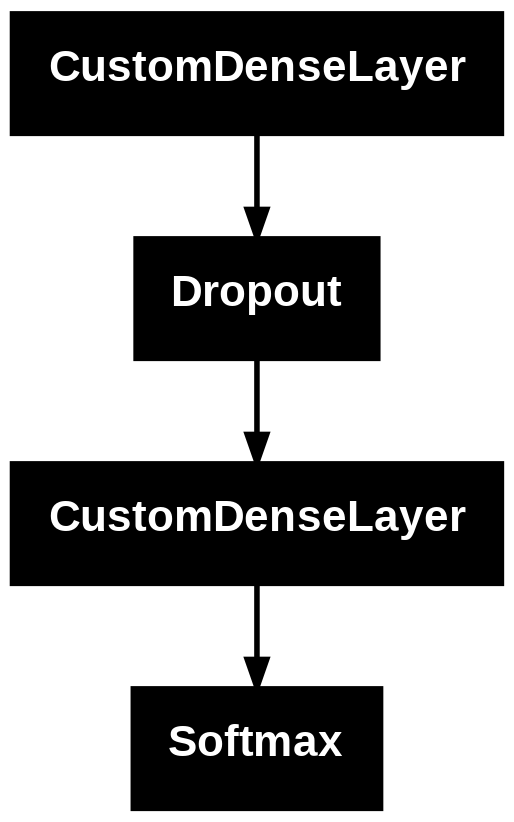

In [22]:
tf.keras.utils.plot_model(model)